In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Cargamos el fichero de datos en un dataframe
fecha = '05-13'
fname = '../../data/' + fecha + '-dataset.csv'
df = pd.read_csv(fname)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   replay             197 non-null    object 
 1   user               197 non-null    object 
 2   group              197 non-null    object 
 3   puzzle             197 non-null    object 
 4   ActiveTime         197 non-null    float64
 5   InactiveTime       197 non-null    float64
 6   CreateShape        197 non-null    int64  
 7   RotateShape        197 non-null    int64  
 8   MoveShape          197 non-null    int64  
 9   ScaleShape         197 non-null    int64  
 10  DeleteFigure       197 non-null    int64  
 11  RotateView         197 non-null    int64  
 12  Snapshots          197 non-null    int64  
 13  CheckSolution      197 non-null    int64  
 14  cube               197 non-null    int64  
 15  pyramid            197 non-null    int64  
 16  ramp               197 non

Para los modelos, de momento, no nos interesan los id de usuario, grupo y replay, así que los eliminamos.

In [3]:
df = df.drop(columns=['replay','user','group'])
df.describe()

,ActiveTime,InactiveTime,CreateShape,RotateShape,MoveShape,ScaleShape,DeleteFigure,RotateView,Snapshots,CheckSolution,cube,pyramid,ramp,cylinder,cone,sphere,spatial_reasoning
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,137.522385,31.718926,4.162437,10.426396,8.725888,4.497462,0.406091,9.248731,1.030457,2.055838,1.289340,1.395939,0.791878,0.147208,0.137056,0.401015,3.029047
std,135.144298,114.772132,1.412051,18.039099,12.171646,7.551608,1.077395,16.123378,2.996441,1.871355,1.433042,1.691993,1.750316,0.538000,0.459033,0.511699,0.658614
min,24.435621,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000
25%,59.101019,0.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000
50%,104.202640,0.000000,4.000000,4.000000,4.000000,2.000000,0.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.166667
75%,161.428934,0.000000,5.000000,12.000000,12.000000,5.000000,0.000000,10.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.500000
max,1180.873135,1119.839469,11.000000,153.000000,83.000000,67.000000,8.000000,117.000000,25.000000,14.000000,10.000000,7.000000,9.000000,4.000000,4.000000,2.000000,4.000000


Creamos un dataset numérico usando one-hot sobre `puzzle`.

In [4]:
# Vamos a procesar las variables categóricas
from sklearn.preprocessing import OneHotEncoder
df_cat  = df.select_dtypes(include="object")
cat_encoder = OneHotEncoder()
cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot = pd.DataFrame(cat_1hot.toarray(), columns=cat_encoder.get_feature_names_out())
df_cat_1hot.head()

,puzzle_45-Degree Rotations,puzzle_Angled Silhouette,puzzle_Bird Fez,puzzle_Pi Henge,puzzle_Pyramids are Strange
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [5]:
df_numerical = df.drop(columns='puzzle')
df_numerical = pd.concat([df_numerical, df_cat_1hot], axis=1)
df_numerical.head()

,ActiveTime,InactiveTime,CreateShape,RotateShape,MoveShape,ScaleShape,DeleteFigure,RotateView,Snapshots,CheckSolution,...,ramp,cylinder,cone,sphere,spatial_reasoning,puzzle_45-Degree Rotations,puzzle_Angled Silhouette,puzzle_Bird Fez,puzzle_Pi Henge,puzzle_Pyramids are Strange
0,127.222051,0.000000,4,2,6,3,1,7,0,1,...,0,1,0,1,2.916667,0.0,0.0,1.0,0.0,0.0
1,77.297240,0.000000,5,0,4,5,0,2,0,1,...,0,0,0,0,3.388889,0.0,0.0,0.0,1.0,0.0
2,125.033755,72.960352,5,12,0,2,1,5,2,1,...,0,0,0,0,3.000000,0.0,0.0,0.0,0.0,1.0
3,47.323649,53.387395,5,18,0,0,0,1,1,1,...,4,0,0,1,3.250000,1.0,0.0,0.0,0.0,0.0
4,230.708718,0.000000,5,2,19,16,0,16,0,4,...,0,3,0,0,2.458333,0.0,0.0,0.0,1.0,0.0


Vamos a ver la matriz de correlación en general y comparamos con la matriz de correlación de cada puzzle. Lo que pretendo comprobar es si el número de formas que se usan está correlado con el razonamiento espacial o no. En el caso de no estarlo, estaríamos reduciendo significativamente el número de características.

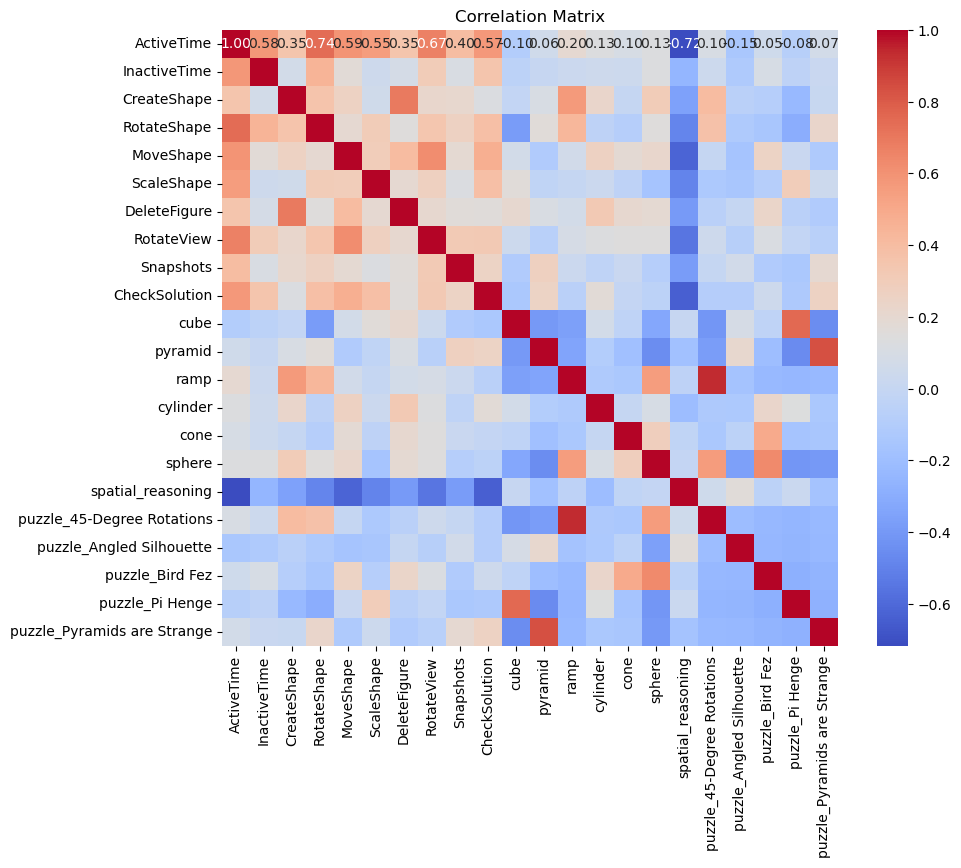

In [6]:
corr_matrix = df_numerical.select_dtypes(include="number").corr()
corr_matrix['spatial_reasoning'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

Vemos que tanto `ActiveTime` como `CheckSolution` y `MoveShape` están muy inversamente correllados con `spatial_reasoning`, sin embargo, el número de cada figura, no parece tener correlación con `spatial_reasoning`. Tiene sentido puesto que las formas utilizadas dependen del puzle y no de la habilidad del usuario. Además, cuanto más tiempo esté activo un jugador, más tiempo está interactuando con la herramienta y es más probable que realice acciones incorrectas o innecesarias.

Vemos también que `spatial_reasonining` no tiene una correlación muy alta con los puzles por lo que podemos asumir que el balance repalys buenas-replays malas es aceptable, aunque hay más buenas que malas.

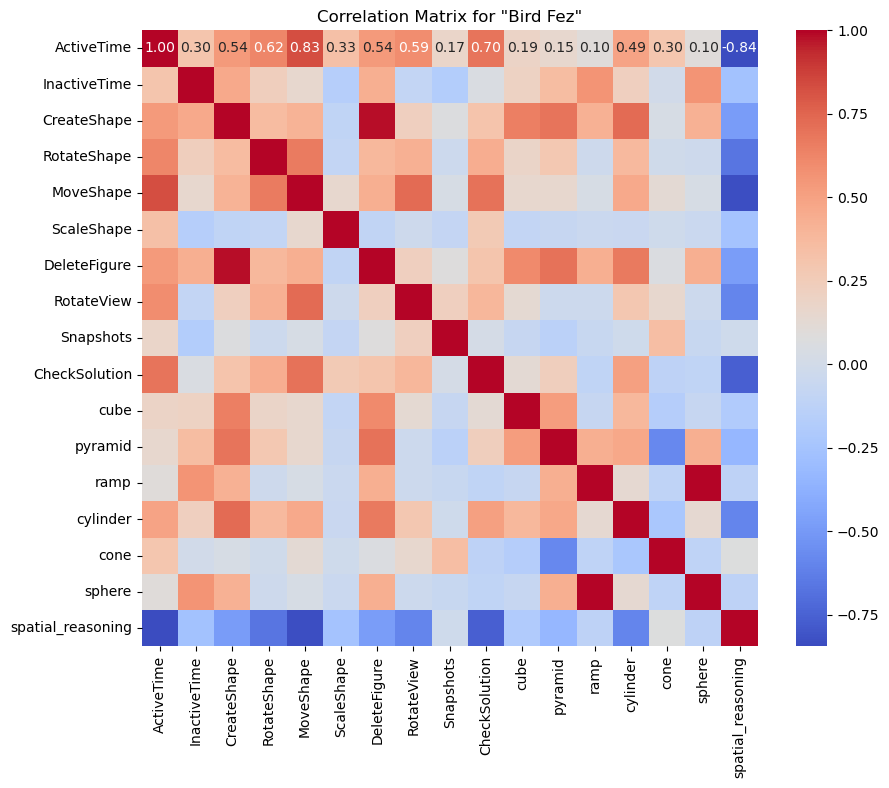

In [7]:
bird_fez = df.loc[df['puzzle']=='Bird Fez']
corr_matrix = bird_fez.select_dtypes(include="number").corr()
corr_matrix['spatial_reasoning'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix for "Bird Fez"')
plt.show()

c:\Users\ana12\anaconda3\envs\TFGenv\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


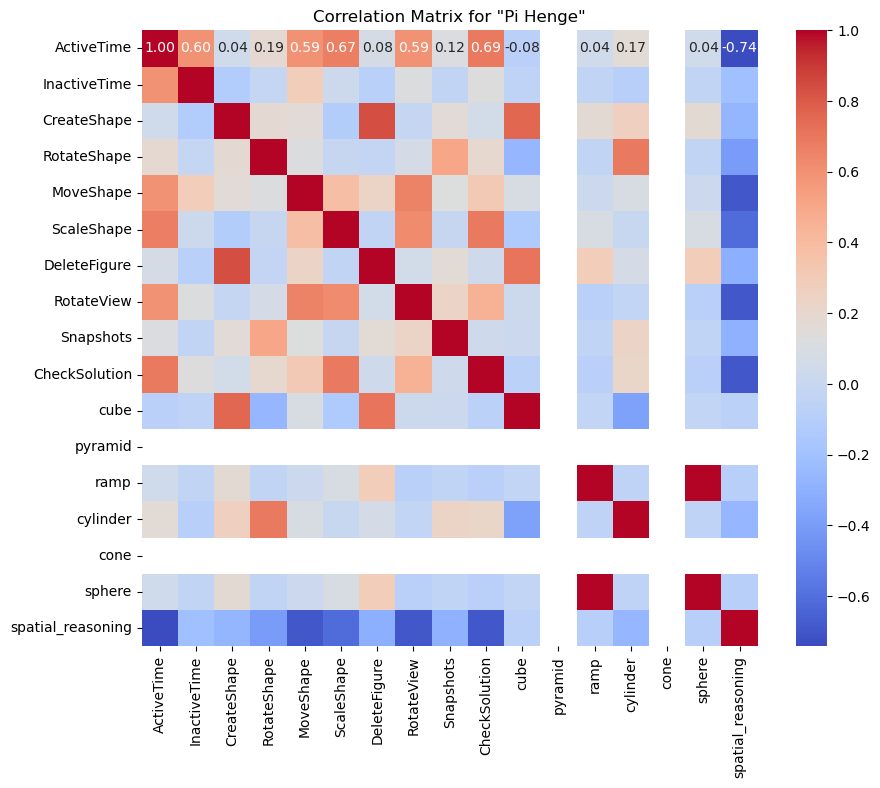

In [8]:
pi_henge = df.loc[df['puzzle']=='Pi Henge']
corr_matrix = pi_henge.select_dtypes(include="number").corr()
corr_matrix['spatial_reasoning'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix for "Pi Henge"')
plt.show()

c:\Users\ana12\anaconda3\envs\TFGenv\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


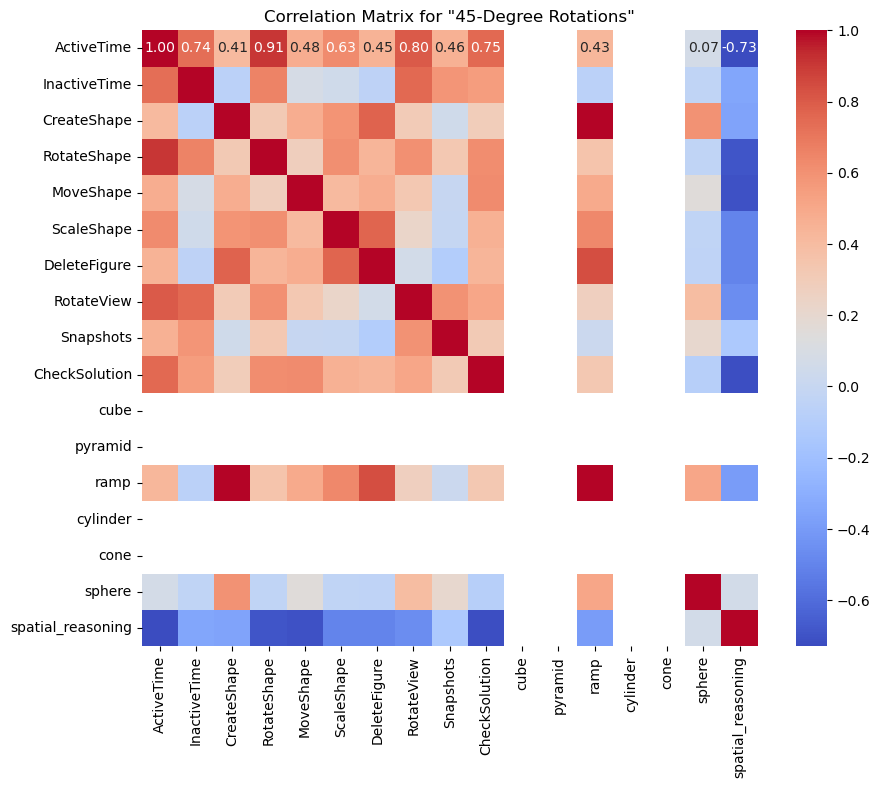

In [9]:
degree_rotations = df.loc[df['puzzle']=='45-Degree Rotations']
corr_matrix = degree_rotations.select_dtypes(include="number").corr()
corr_matrix['spatial_reasoning'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix for "45-Degree Rotations"')
plt.show()

c:\Users\ana12\anaconda3\envs\TFGenv\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


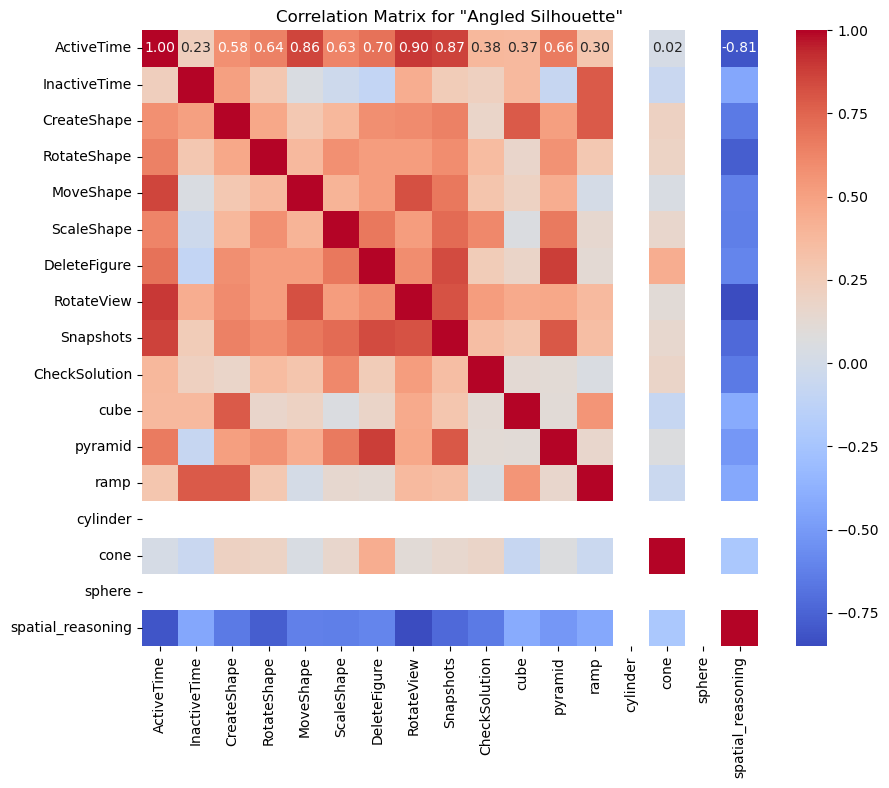

In [10]:
angled_silhouette = df.loc[df['puzzle']=='Angled Silhouette']
corr_matrix = angled_silhouette.select_dtypes(include="number").corr()
corr_matrix['spatial_reasoning'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix for "Angled Silhouette"')
plt.show()

c:\Users\ana12\anaconda3\envs\TFGenv\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


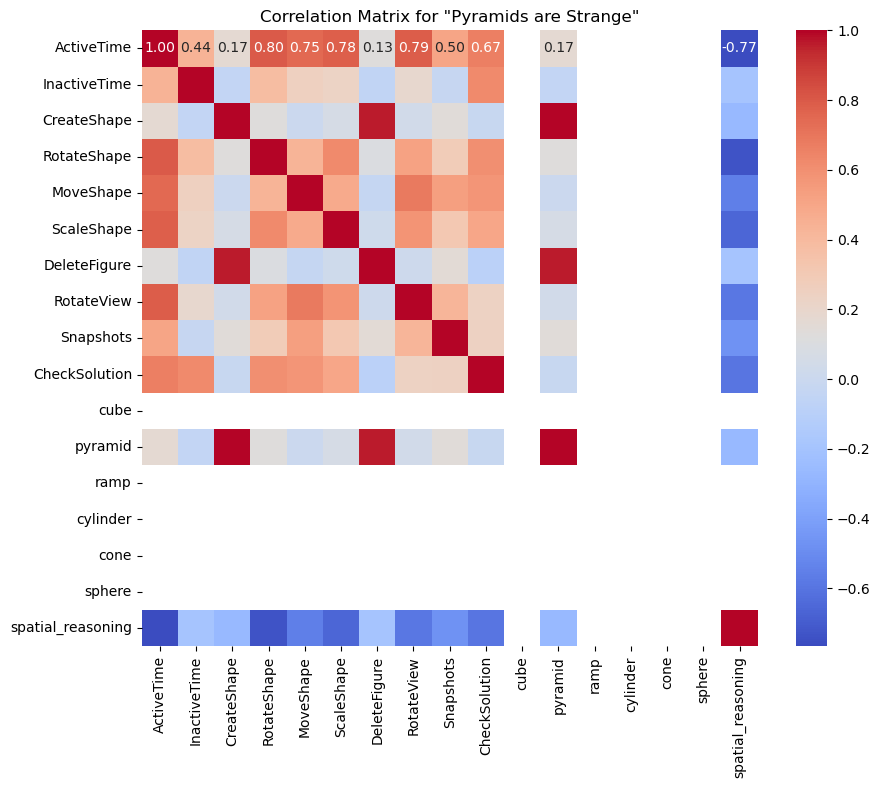

In [11]:
pyramids = df.loc[df['puzzle']=='Pyramids are Strange']
corr_matrix = pyramids.select_dtypes(include="number").corr()
corr_matrix['spatial_reasoning'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix for "Pyramids are Strange"')
plt.show()

Vemos que `ActiveTime` y `CheckSolution` siguen estando muy correlados con `spatial_reasoning` para cada uno de los puzles, aunque para cada puzle ciertas características pueden tener más correlación. Sin embargo, la formas siguen sin tener mucha relevancia.

Vamos a ver qué pasa si unificamos `CheckSolution` y `Snapshots` en una característica, como hemos hecho en la rúbrica.

In [12]:
# Definimos un diccionario con el número de vistas por puzle
n_views = {
    'Bird Fez': 3,
    'Pi Henge': 3,
    '45-Degree Rotations': 4,
    'Angled Silhouette': 3,
    'Pyramids are Strange': 1
}

# Para cada puzle sumamos la columas snapshots con (checksubmit-1)*n_views, restamos 1 porque nos interesan los submit que "sobran"
# Mapear los valores de vistas al DataFrame usando la columna puzzle
df['views'] = df['puzzle'].map(n_views)

# Calcular el nuevo valor
df['snap_submit'] = df['Snapshots'] + (df['CheckSolution'] - 1) * df['views']

# Mostrar el DataFrame actualizado
print(df.head())

                 puzzle  ActiveTime  InactiveTime  CreateShape  RotateShape  \
0              Bird Fez  127.222051      0.000000            4            2   
1              Pi Henge   77.297240      0.000000            5            0   
2  Pyramids are Strange  125.033755     72.960352            5           12   
3   45-Degree Rotations   47.323649     53.387395            5           18   
4              Pi Henge  230.708718      0.000000            5            2   

   MoveShape  ScaleShape  DeleteFigure  RotateView  Snapshots  CheckSolution  \
0          6           3             1           7          0              1   
1          4           5             0           2          0              1   
2          0           2             1           5          2              1   
3          0           0             0           1          1              1   
4         19          16             0          16          0              4   

   cube  pyramid  ramp  cylinder  cone  sphe

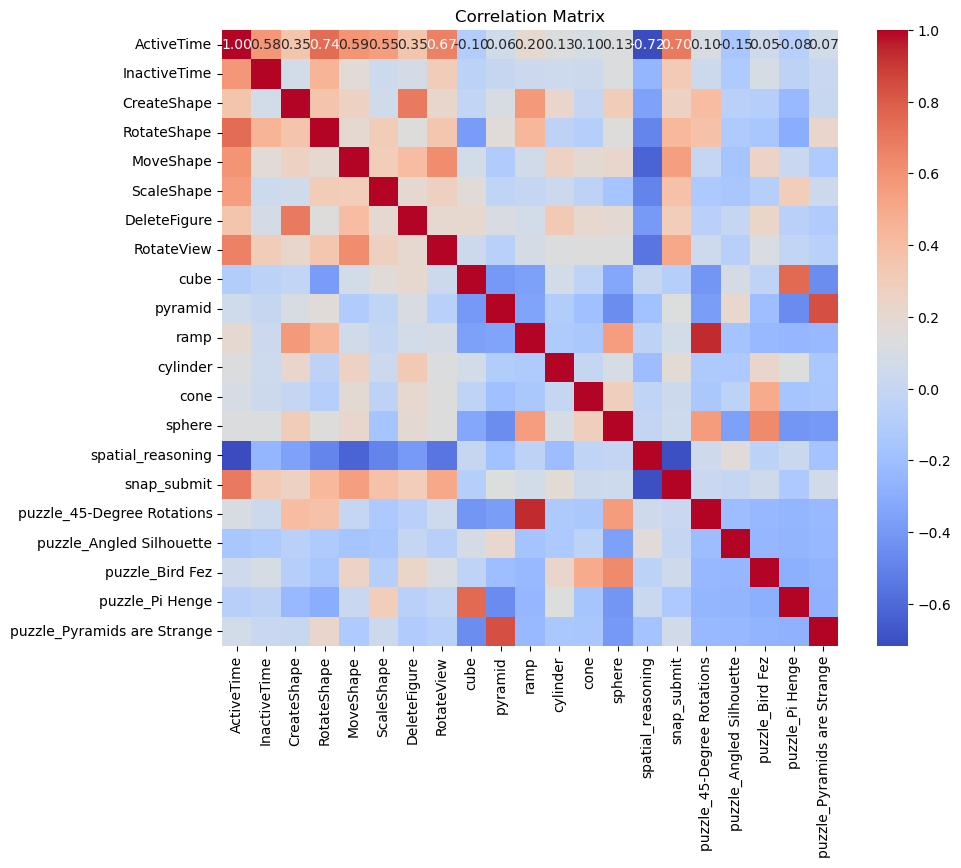

In [13]:
df_cat  = df.select_dtypes(include="object")
cat_encoder = OneHotEncoder()
cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot = pd.DataFrame(cat_1hot.toarray(), columns=cat_encoder.get_feature_names_out())
df_numerical = df.drop(columns=['puzzle','Snapshots','CheckSolution','views'])
df_numerical = pd.concat([df_numerical, df_cat_1hot], axis=1)
corr_matrix = df_numerical.select_dtypes(include="number").corr()
corr_matrix['spatial_reasoning'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

Efectivamente, esta nueva característica está muy correlacionada con `spatial_reasoning`. Se observan varias cosas:
- Sorprendentemente, `RotateShape` no tiene correlación negativa con `spatial_reasoning` aun teniendo relación directa con 'rotation', que es la única etiqueta que modela Mental Rotation.
- Sin embargo, `MoveShape`, que principalmente afecta en la etiqueta de 'action_seq' sí tiene una correlación significativa.
- Lo mismo pasa con `RotateView`y `snap_submit`, puesto que solo son dos para el mismo constructo y suelen tener valores muy altos, salvo en las replays muy malas.

Vamos a crear el dataset numérico usando esta nueva característica en lugar de usar `CheckSolution` y `Snapshots`.

In [14]:
df_numerical.to_csv('../../data/'+fecha+'-dataset-numerical.csv')
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ActiveTime                   197 non-null    float64
 1   InactiveTime                 197 non-null    float64
 2   CreateShape                  197 non-null    int64  
 3   RotateShape                  197 non-null    int64  
 4   MoveShape                    197 non-null    int64  
 5   ScaleShape                   197 non-null    int64  
 6   DeleteFigure                 197 non-null    int64  
 7   RotateView                   197 non-null    int64  
 8   cube                         197 non-null    int64  
 9   pyramid                      197 non-null    int64  
 10  ramp                         197 non-null    int64  
 11  cylinder                     197 non-null    int64  
 12  cone                         197 non-null    int64  
 13  sphere              

array([[<Axes: xlabel='spatial_reasoning', ylabel='spatial_reasoning'>,
        <Axes: xlabel='ActiveTime', ylabel='spatial_reasoning'>,
        <Axes: xlabel='MoveShape', ylabel='spatial_reasoning'>,
        <Axes: xlabel='snap_submit', ylabel='spatial_reasoning'>],
       [<Axes: xlabel='spatial_reasoning', ylabel='ActiveTime'>,
        <Axes: xlabel='ActiveTime', ylabel='ActiveTime'>,
        <Axes: xlabel='MoveShape', ylabel='ActiveTime'>,
        <Axes: xlabel='snap_submit', ylabel='ActiveTime'>],
       [<Axes: xlabel='spatial_reasoning', ylabel='MoveShape'>,
        <Axes: xlabel='ActiveTime', ylabel='MoveShape'>,
        <Axes: xlabel='MoveShape', ylabel='MoveShape'>,
        <Axes: xlabel='snap_submit', ylabel='MoveShape'>],
       [<Axes: xlabel='spatial_reasoning', ylabel='snap_submit'>,
        <Axes: xlabel='ActiveTime', ylabel='snap_submit'>,
        <Axes: xlabel='MoveShape', ylabel='snap_submit'>,
        <Axes: xlabel='snap_submit', ylabel='snap_submit'>]], dtype=objec

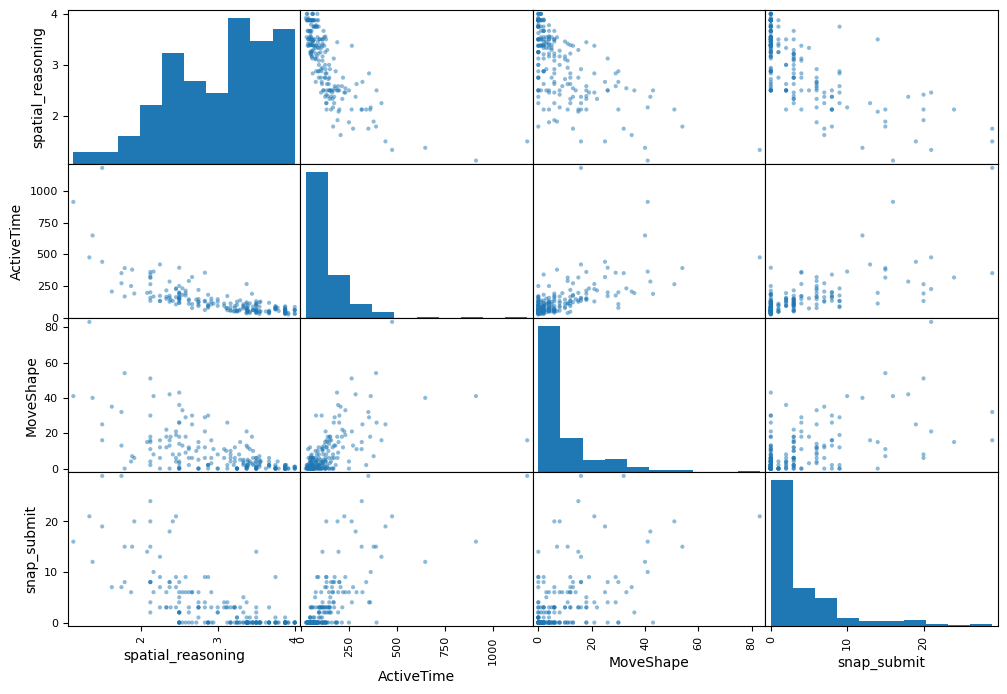

In [15]:
from pandas.plotting import scatter_matrix
# Comparamos las features continuas
attributes = ['spatial_reasoning', 'ActiveTime', 'MoveShape', 'snap_submit']
scatter_matrix(df_numerical[attributes],figsize=(12,8))

Parece que hay correlación inversa entre `ActiveTime` y `spatial_reasoning`. Es decir, a mayor tiempo activo, menor habilidad en razonamiento espacial. 